# Hovmueller diagram of Pb concentration of particles over time

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pickle
from matplotlib.ticker import FormatStrFormatter, MultipleLocator
import matplotlib.dates as mdates

%matplotlib inline

#### Parameters

In [2]:
# colors:
land_color = '#a9a7a2'

# domain dimensions:
jmin, jmax = 159, 799
imin, imax = 1139, 2179
isize = imax - imin
jsize = jmax - jmin

# run result file location:
base_folder = '/ocean/brogalla/GEOTRACES/parcels/Pb-chapter/'

#### Load files

In [3]:
mesh         = xr.open_dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mask_Pb-20220317.nc')
mesh_lon     = mesh['nav_lon'].values
mesh_lat     = mesh['nav_lat'].values
mesh_bathy   = mesh['tmask'][0,:,:,:].values
bathy_masked = np.ma.masked_where((mesh_bathy> 0.1), mesh_bathy)
ocean_masked = np.ma.masked_where((mesh_bathy<0.1), mesh_bathy)
depths       = mesh['nav_lev'].values

In [5]:
pt = xr.open_zarr('/ocean/brogalla/GEOTRACES/parcels/Pb-chapter/test2-20230202.zarr')

ModuleNotFoundError: No module named 'zarr'

#### Functions

In [ ]:
def load_tracks(filename, tracer='dissolpb'):
    file  = xr.open_zarr(filename)
    traj  = file['trajectory'].values # dimensions: number of particles, tracks
    time  = file['time'].values       # units: seconds
    lat   = file['lat'].values        # degrees North
    lon   = file['lon'].values        # degrees East
    depth = file['z'].values          # meters
    trace = file[tracer].values       # tracer concentration
    
    return traj, time, lon, lat, depth, trace

In [80]:
def hovmoeller(timet, lont, latt, trajt, tracert):
    
    # Hoevmueller diagram: 
    fig, ax = plt.subplots(2,1, figsize=(7,6), dpi=300)

    ax[0].set_title('Parry Channel transect', fontsize=7)
    ax[1].set_title('Baffin Bay transect', fontsize=7)
    
    # for particle in range(0,600):
    #     cf1 = ax[0].scatter(timet[particle,:], np.ones(latt[particle,:].shape)*latt[particle,0], \
    #                         c=tracert[particle,:], s=1) 
    time_plot   = np.ma.masked_where(np.isnan(timet), timet)
    lat_plot    = np.ma.masked_where(np.isnan(latt), latt)
    lon_plot    = np.ma.masked_where(np.isnan(lont), lont)
    tracer_plot = np.ma.masked_where(np.isnan(tracert), tracert)
    
    cf1 = ax[0].contourf(time_plot[0:600,:], np.tile(lat_plot[0:600,0], (time_plot.shape[1],1)).T, tracer_plot[0:600,:]*1e12, \
                         levels=20, vmin=0, vmax=10) 
    cf2 = ax[1].contourf(time_plot[600:,:], np.tile(lon_plot[600:,0], (time_plot.shape[1],1)).T, tracer_plot[600:,:]*1e12, \
                         vmin=0, vmax=50) 
        
    for axis in ax.ravel():
        axis.set_xlabel('Date',fontsize=6)
        axis.set_ylabel('Release latitude [degrees north]', fontsize=6)
        axis.tick_params(axis='both', which='major', labelsize=6)
    #     axis.set_ylim(0,20)
        
    # cbar = plt.colorbar(cf1, orientation='horizontal', pad=0.04, aspect=50, extendrect=True, label='dPb [pM]')
    
    return

In [120]:
def hovmoeller_simple(timet, lont, latt, trajt, tracert):
    
    # Hoevmueller diagram: 
    fig, ax = plt.subplots(2,1, figsize=(7,6), dpi=300)

    ax[0].set_title('Parry Channel transect', fontsize=7)
    ax[1].set_title('Baffin Bay transect', fontsize=7)
    
    for particle in np.arange(0,600,30):
        cf1 = ax[0].scatter(timet[particle,:], np.ones(latt[particle,:].shape)*latt[particle,0], \
                            c=tracert[particle,:]*1e12, s=15, vmin=0, vmax=20) 
    for particle in np.arange(600,1400,30):
        cf2 = ax[1].scatter(timet[particle,:], np.ones(lont[particle,:].shape)*lont[particle,0], \
                            c=tracert[particle,:]*1e12, s=15, vmin=0, vmax=20) 

    ax[0].set_ylim(74,76.5)
    ax[0].set_ylabel('Release latitude [degrees north]', fontsize=6)
    ax[1].set_ylim(-68,-48)
    ax[1].set_ylabel('Release longitude [degrees east]', fontsize=6)
    
    for axis in ax.ravel():
        axis.set_xlabel('Date',fontsize=6)
        axis.tick_params(axis='both', which='major', labelsize=6)   
        axis.xaxis.set_minor_locator(mdates.DayLocator(interval=7))

    # cbar = plt.colorbar(cf1, orientation='horizontal', pad=0.04, aspect=50, extendrect=True, label='dPb [pM]')
    
    return

#### Main section

In [63]:
# Load results: 
traj_t1, time_t1, lon_t1, lat_t1, depth_t1, dPb_t1 = load_tracks(f'{base_folder}test2-20230202.zarr', tracer='dissolpb')

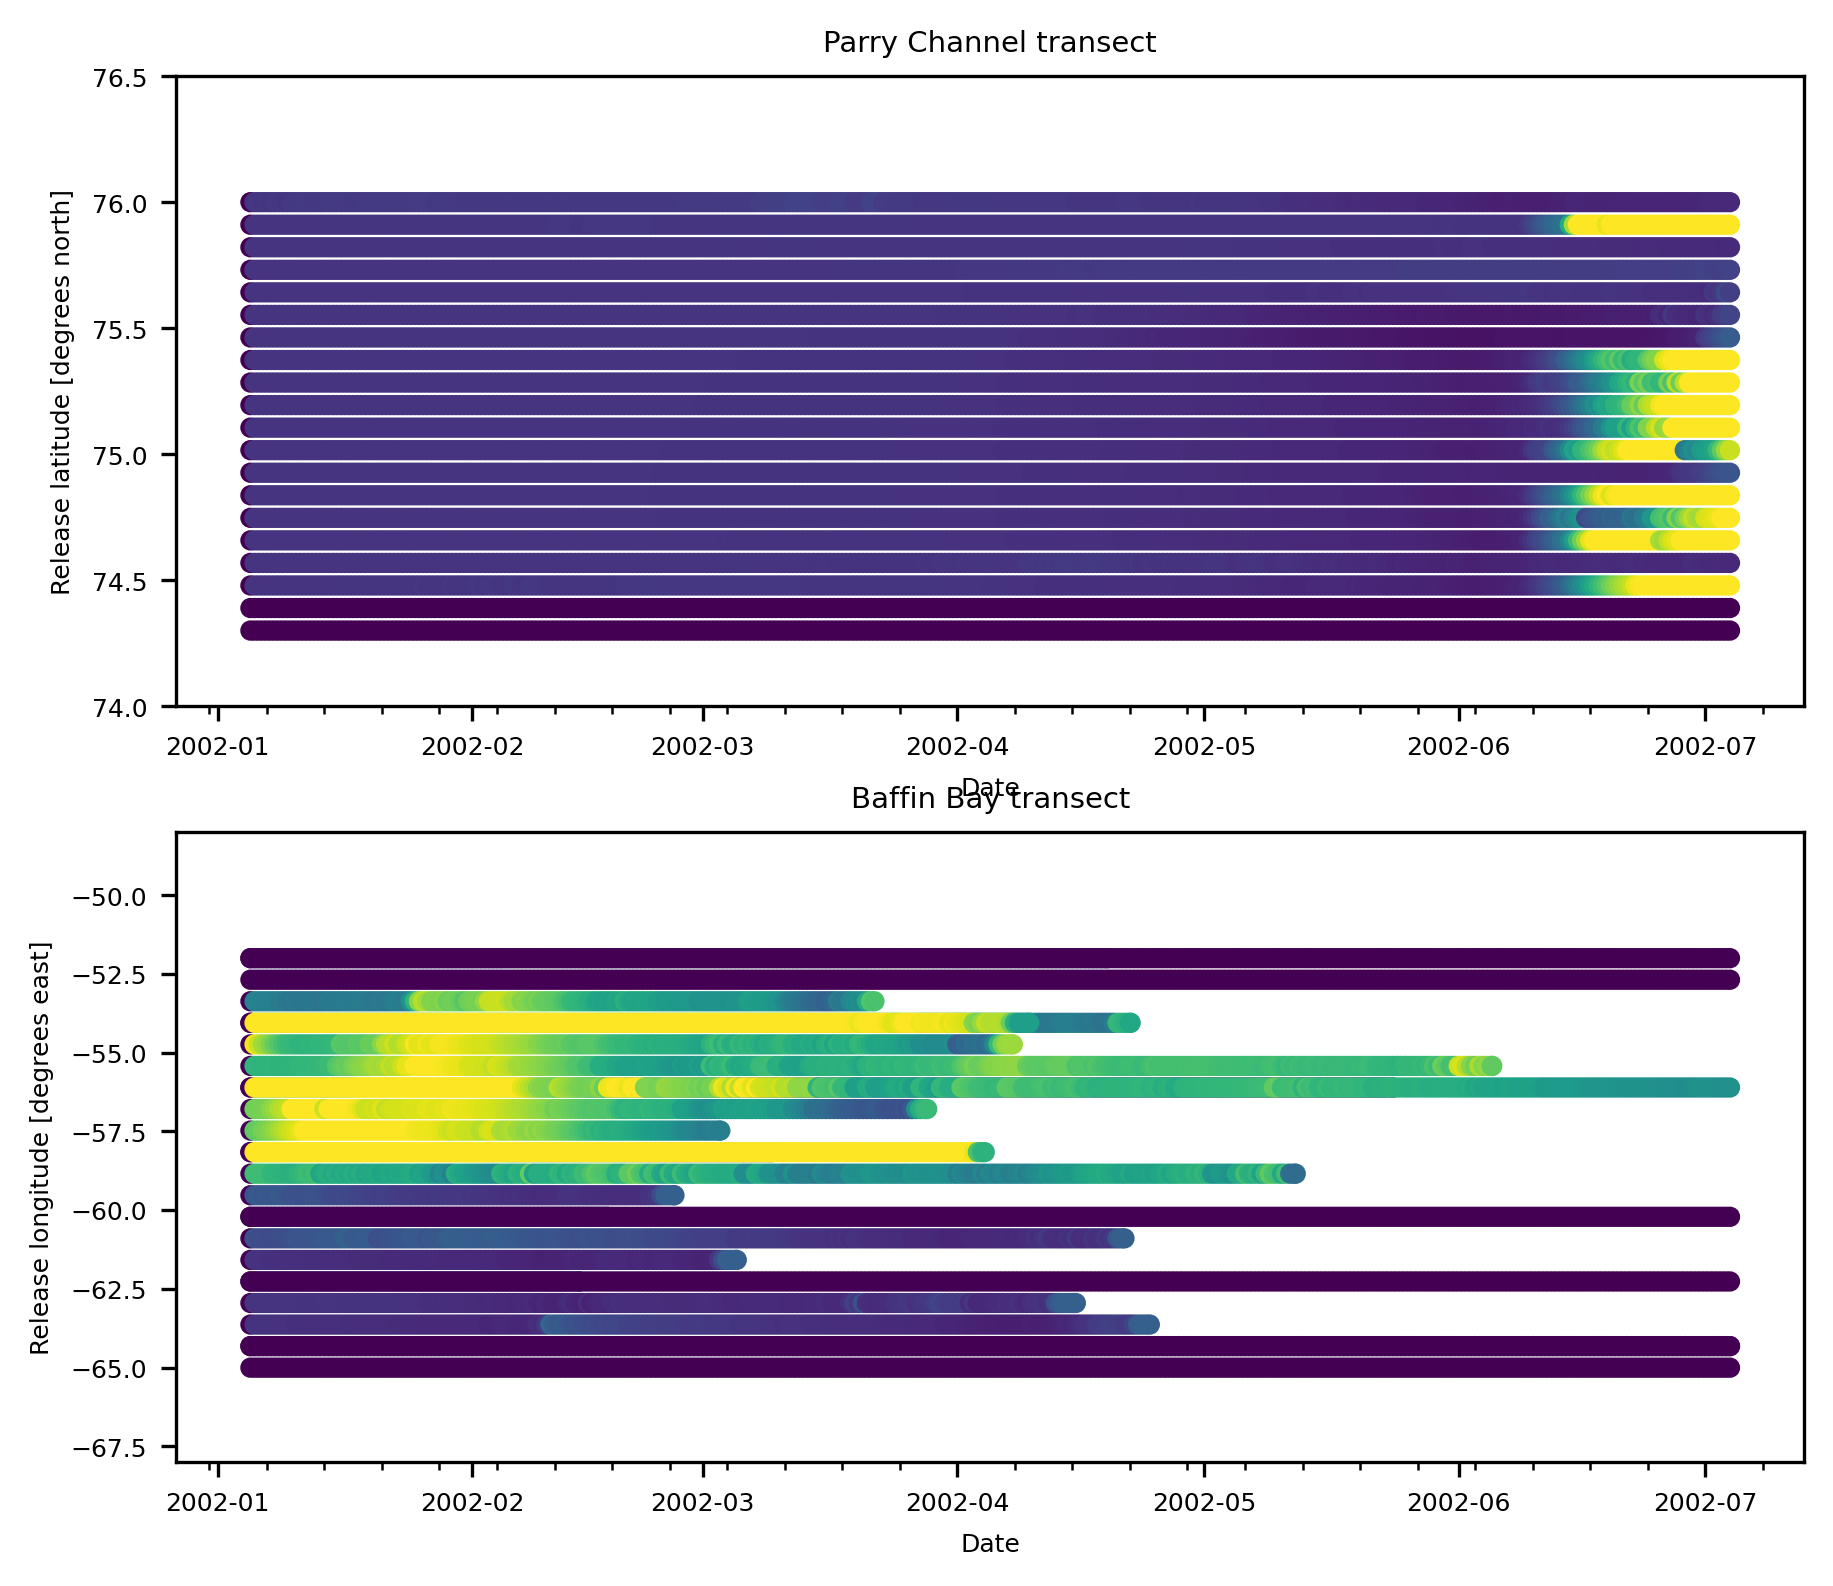

In [121]:
hovmoeller_simple(time_t1, lon_t1, lat_t1, traj_t1, dPb_t1)

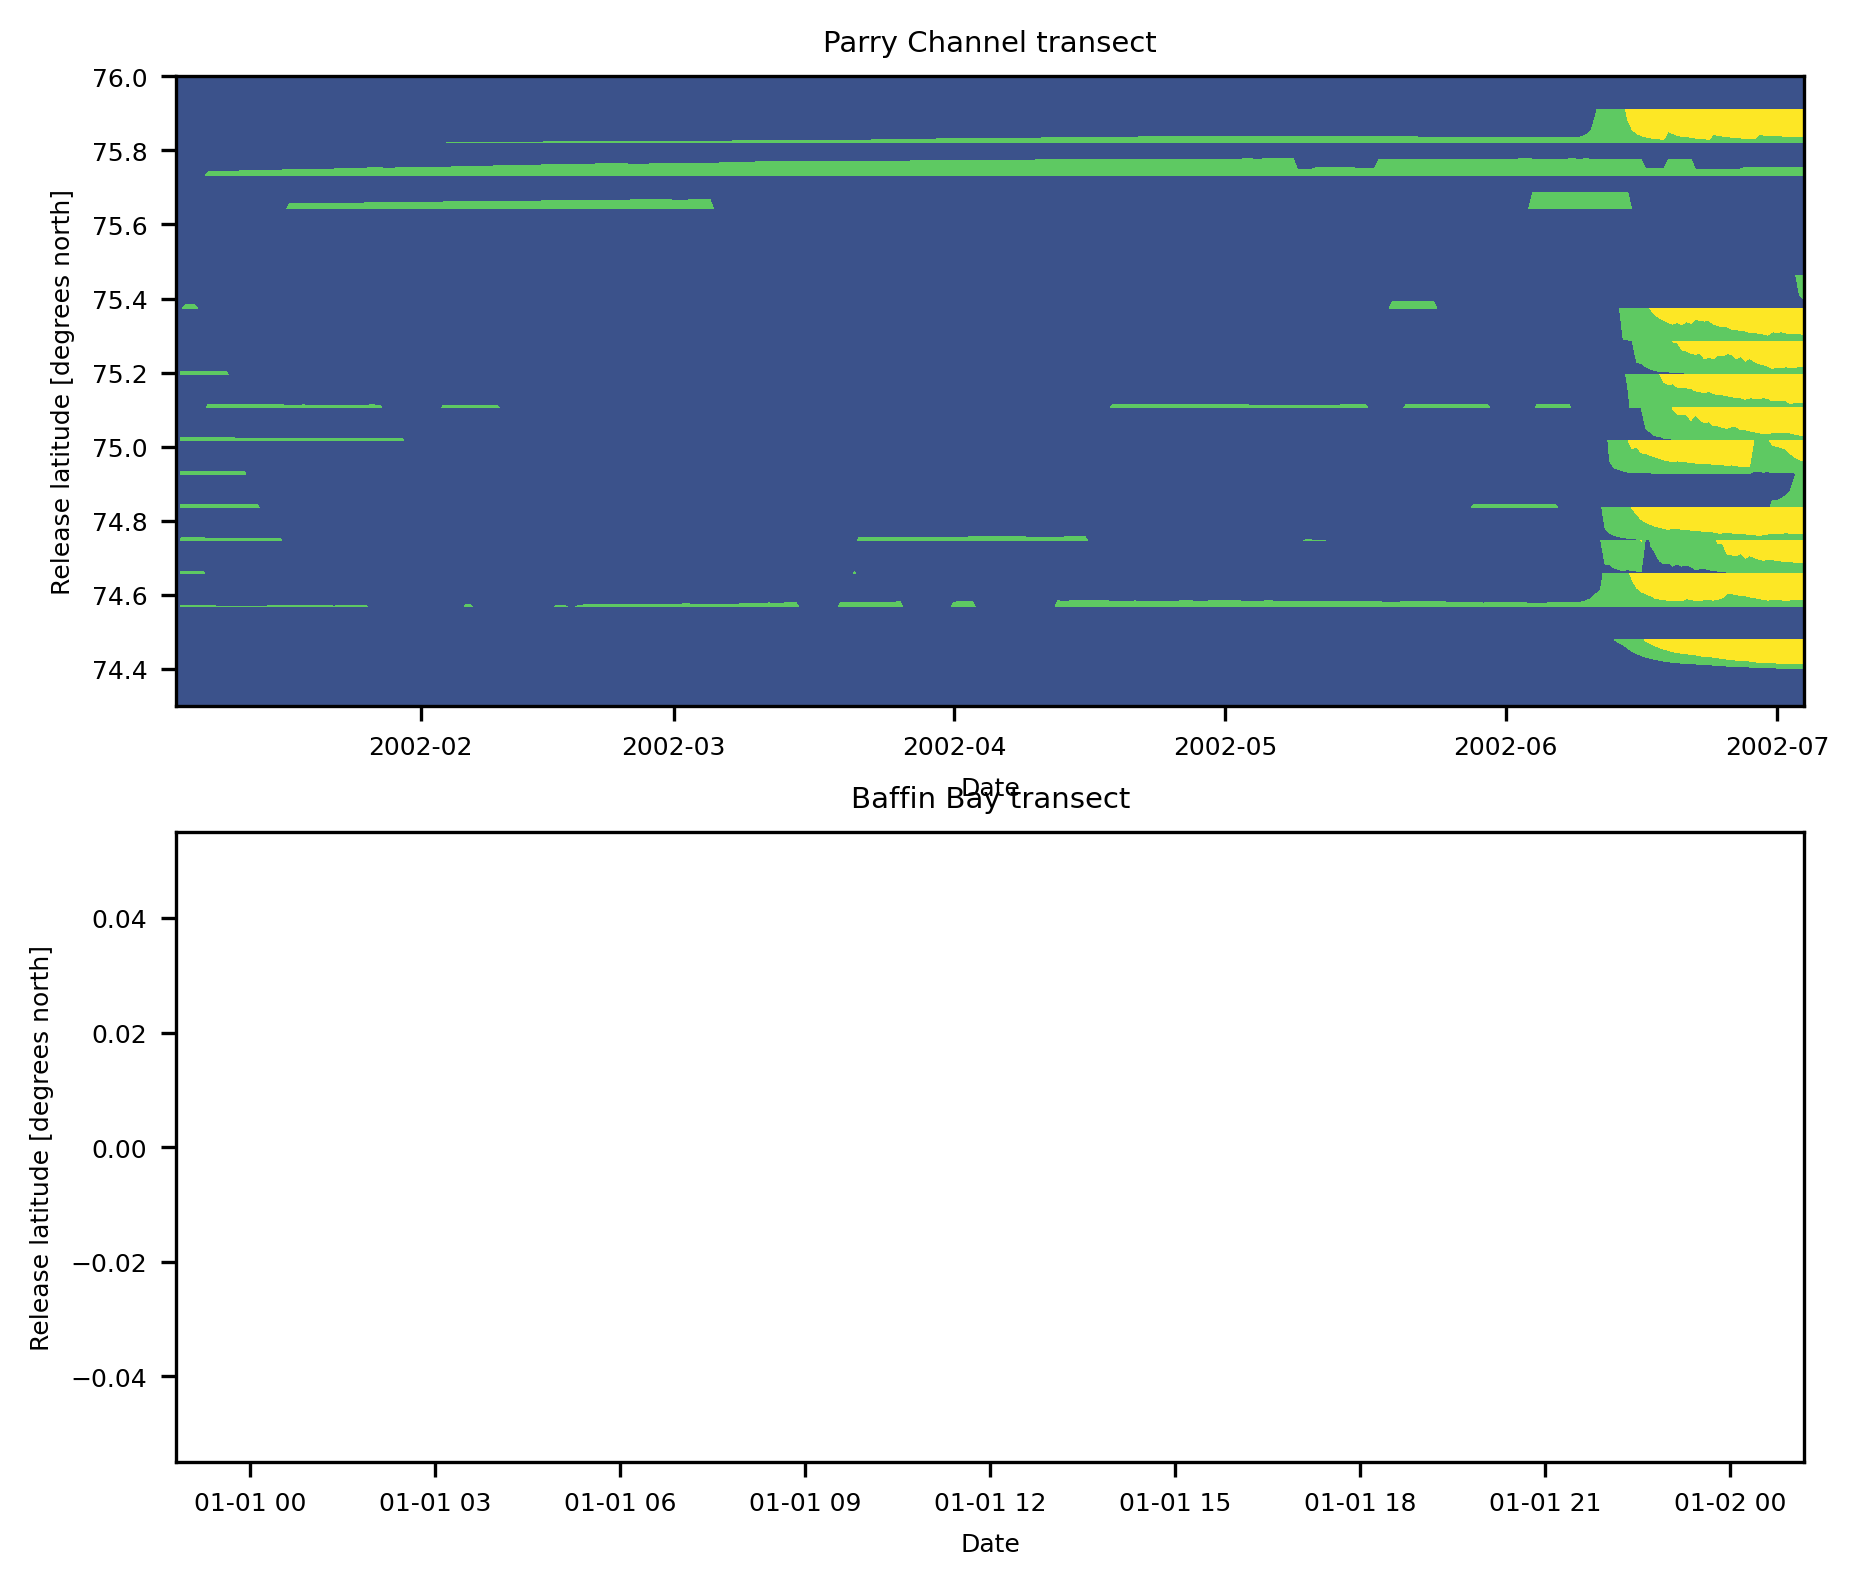

In [81]:
hovmoeller(time_t1, lon_t1, lat_t1, traj_t1, dPb_t1)